<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/InferentialStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Probability

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
c = np.array([1, 2, 4, 3])

prob = 100*c / np.sum(c)

print(prob)

[10. 20. 40. 30.]


In [6]:
## draw marbles from a jar

blue = 40
yellow = 30
orange = 20

totMarbs = blue+yellow+orange

jar = np.hstack((1*np.ones(blue), 2*np.ones(yellow), 3*np.ones(orange)))

np.random.shuffle(jar)

print(jar)

[2. 2. 3. 1. 1. 1. 1. 1. 1. 3. 3. 2. 1. 1. 3. 3. 2. 2. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 2. 1. 1. 2. 3. 1. 2. 2. 3. 1. 3. 3. 1. 2. 2. 2. 3. 1. 1. 1. 1.
 2. 3. 3. 1. 1. 2. 1. 3. 1. 3. 2. 3. 2. 2. 3. 2. 3. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 1. 2. 1. 3. 3. 2. 1. 2. 1. 2. 2. 2. 3. 1. 1. 1.]


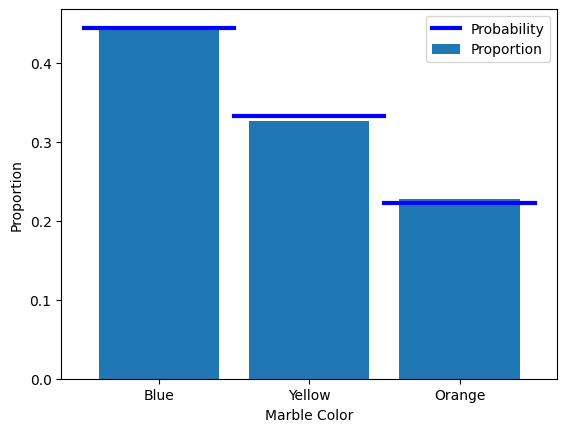

In [12]:
# draw 500 marbles with replacement
numDraws = 500
drawColors = np.zeros(numDraws)

for i in range(numDraws):
  randMarble = int(np.random.rand()*totMarbs)

  drawColors[i] = jar[randMarble]

propBlue = np.sum(drawColors == 1) / numDraws
propYellow = np.sum(drawColors == 2) / numDraws
propOrange = np.sum(drawColors == 3) / numDraws

plt.bar([1, 2, 3], [propBlue, propYellow, propOrange], label='Proportion')
plt.plot([0.5, 1.5], [blue/totMarbs, blue/totMarbs], 'b', linewidth=3, label='Probability')
plt.plot([1.5, 2.5], [yellow/totMarbs, yellow/totMarbs], 'b', linewidth=3)
plt.plot([2.5, 3.5], [orange/totMarbs, orange/totMarbs], 'b', linewidth=3)

plt.xticks([1, 2, 3], labels=('Blue', 'Yellow', 'Orange'))
plt.xlabel('Marble Color')
plt.ylabel('Proportion')
plt.legend()

plt.show()

## Odds heatmap

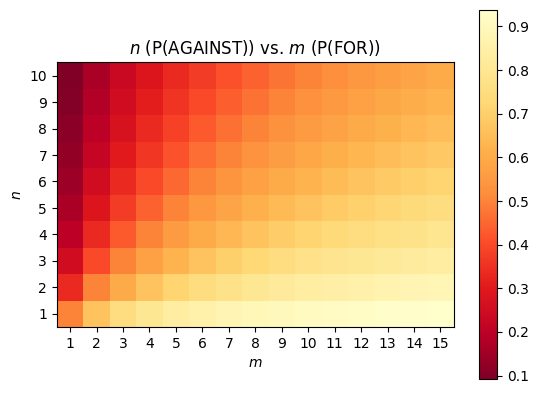

In [30]:
# prob for

m = 15

# prob against

n = 10

odds = np.zeros((m, n))

for i in range(m):
  for j in range(n):
    odds[i, j] = 1 / (1 + (j + 1) / (i + 1))

plt.imshow(odds.T, cmap='YlOrRd_r', origin='lower')
plt.xticks([i for i in range(0, m)], [i for i in range(1, m+1)])
plt.yticks([i for i in range(0, n)], [i for i in range(1, n+1)])

plt.xlabel("$m$")
plt.ylabel("$n$")

plt.title("$n$ (P(AGAINST)) vs. $m$ (P(FOR))")

plt.colorbar()

plt.show()

## Probability mass functions

In [31]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
## draw marbles from a jar

blue = 40
yellow = 30
orange = 20

totMarbs = blue+yellow+orange

jar = np.hstack((1*np.ones(blue), 2*np.ones(yellow), 3*np.ones(orange)))

np.random.shuffle(jar)

print(jar)

[2. 1. 3. 1. 2. 1. 1. 3. 1. 2. 2. 2. 1. 1. 2. 3. 2. 1. 3. 1. 2. 3. 1. 1.
 1. 2. 2. 1. 2. 3. 1. 1. 1. 2. 1. 3. 1. 2. 3. 2. 2. 1. 1. 2. 1. 2. 2. 3.
 1. 1. 1. 1. 3. 3. 1. 2. 2. 1. 1. 3. 1. 2. 2. 2. 1. 2. 2. 1. 3. 2. 3. 2.
 3. 3. 1. 2. 3. 3. 1. 3. 2. 1. 1. 1. 2. 1. 3. 1. 1. 1.]


In [33]:
# draw 500 marbles with replacement
numDraws = 500
drawColors = np.zeros(numDraws)

for i in range(numDraws):
  randMarble = int(np.random.rand()*totMarbs)

  drawColors[i] = jar[randMarble]

propBlue = np.sum(drawColors == 1) / numDraws
propYellow = np.sum(drawColors == 2) / numDraws
propOrange = np.sum(drawColors == 3) / numDraws

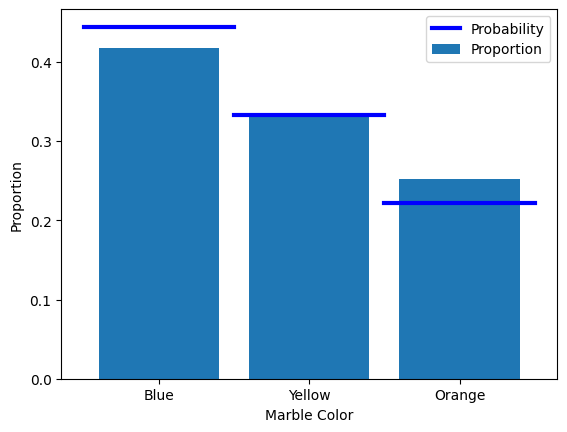

In [34]:
# plot probability mass function

plt.bar([1, 2, 3], [propBlue, propYellow, propOrange], label='Proportion')
plt.plot([0.5, 1.5], [blue/totMarbs, blue/totMarbs], 'b', linewidth=3, label='Probability')
plt.plot([1.5, 2.5], [yellow/totMarbs, yellow/totMarbs], 'b', linewidth=3)
plt.plot([2.5, 3.5], [orange/totMarbs, orange/totMarbs], 'b', linewidth=3)

plt.xticks([1, 2, 3], labels=('Blue', 'Yellow', 'Orange'))
plt.xlabel('Marble Color')
plt.ylabel('Proportion')
plt.legend()

plt.show()

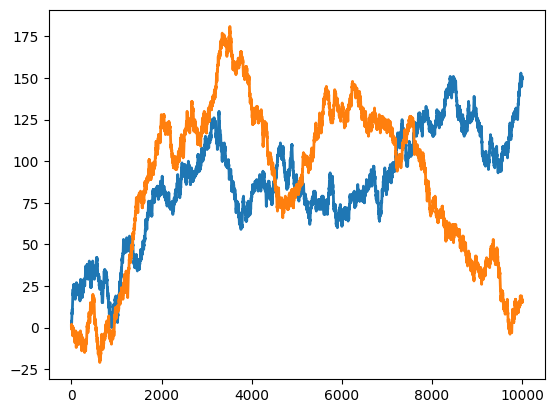

In [36]:
## compute empirical probability function

# continuous signal (technically discrete, but many data points)
N = 10004
datats1 = np.cumsum(np.sign(np.random.randn(N)))
datats2 = np.cumsum(np.sign(np.random.randn(N)))

plt.plot(np.arange(N), datats1, linewidth=2)
plt.plot(np.arange(N), datats2, linewidth=2)
plt.show()

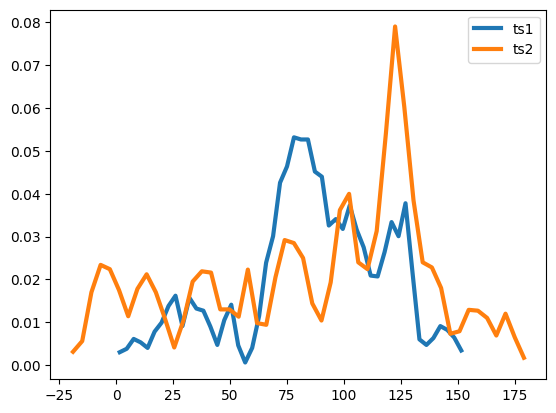

In [37]:
# discretize using histograms

k = 50

y,x = np.histogram(datats1, k)
x1 = (x[1:]+x[:-1])/2
y1 = y/sum(y)

y,x = np.histogram(datats2, k)
x2 = (x[1:]+x[:-1])/2
y2 = y/sum(y)

plt.plot(x1, y1, x2, y2, linewidth=3)
plt.legend(('ts1', 'ts2'))
plt.show()

## Cumulative Distribution Function

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [39]:
x = np.linspace(0, 5, 1001)

p1 = stats.lognorm.pdf(x, 1)
c1 = stats.lognorm.cdf(x, 1)

p2 = stats.lognorm.pdf(x, .1)
c2 = stats.lognorm.cdf(x, .1)

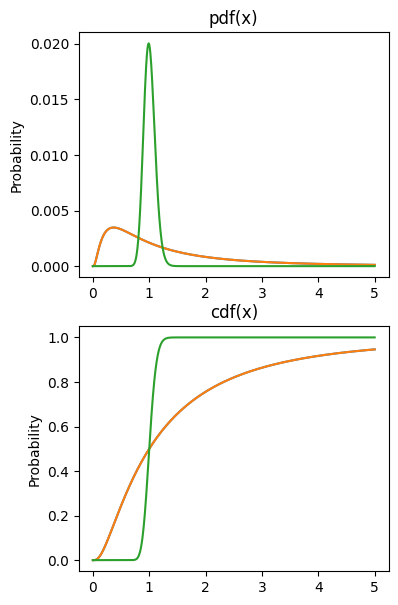

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(4,7))

# draw pdfs
ax[0].plot(x, p1/np.sum(p1))
ax[0].plot(x, p1/np.sum(p1), x, p2/np.sum(p2))
ax[0].set_ylabel('Probability')
ax[0].set_title('pdf(x)')

# draw cdfs
ax[1].plot(x, c1)
ax[1].plot(x, c1, x, c2)
ax[1].set_ylabel('Probability')
ax[1].set_title('cdf(x)')

plt.show()

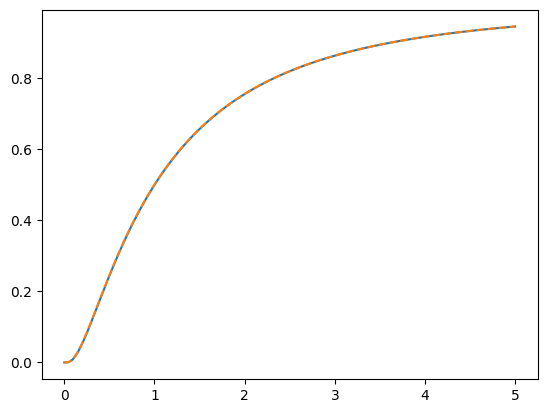

In [52]:
# compute cdf from pdf

c1x = np.cumsum(p1) # incorrect, because pdf is not normalized/scaled
# we need to multiply pdf by dx, i.e. discretization of x axis, i.e. x[1]-x[0], i.e. difference between successive points on x axis

c1x = np.cumsum(p1*(x[1]-x[0])) # correct

plt.plot(x, c1)
plt.plot(x, c1x, '--')
plt.show()

/tmp/ipython-input-1199247232.py:16: RuntimeWarning: invalid value encountered in divide
  ax[0].plot(x, pdf_dataset/np.sum(pdf_dataset), label=f'{j}')


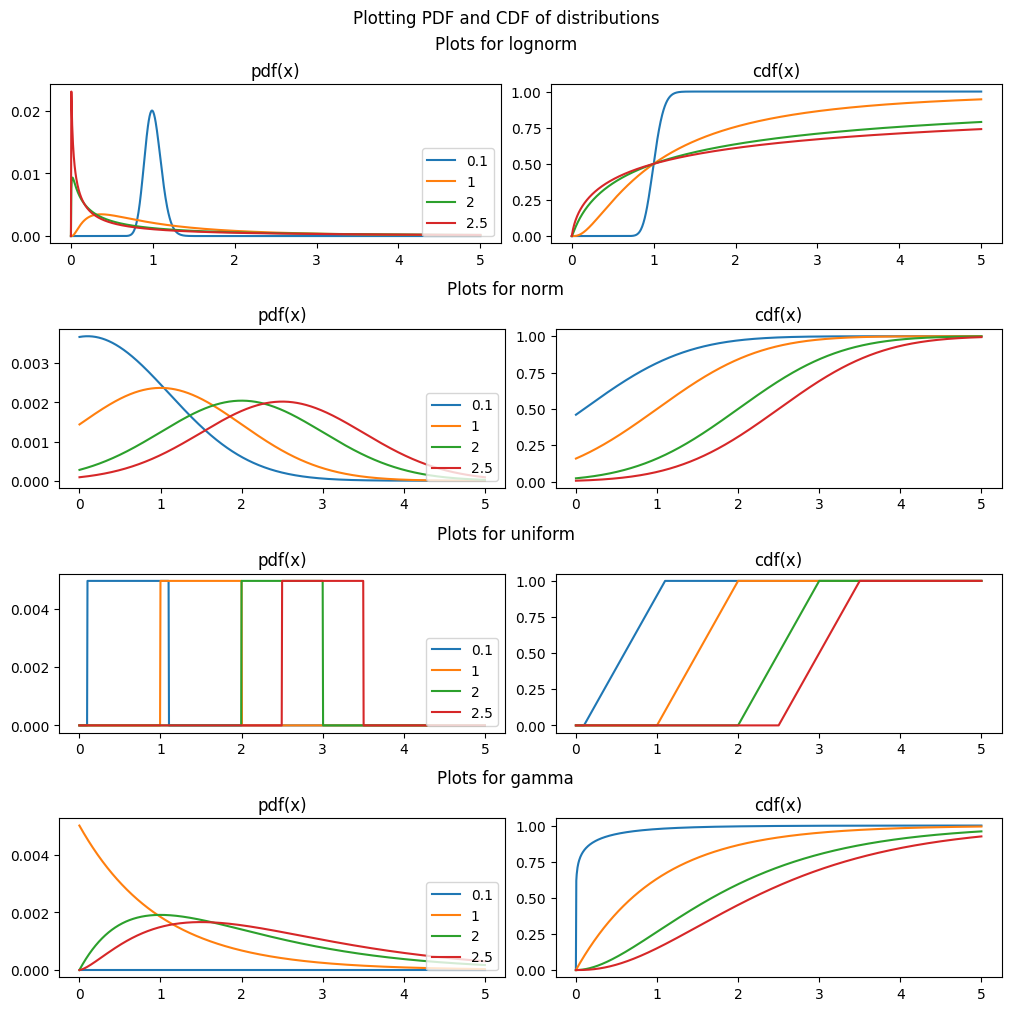

In [54]:
## comparing pdf and cdf of distributions

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
fig.suptitle('Plotting PDF and CDF of distributions')
dist_list = [stats.lognorm, stats.norm, stats.uniform, stats.gamma]
subfigs = fig.subfigures(nrows=len(dist_list), ncols=1)

for row, (subfig, fn) in enumerate(zip(subfigs, dist_list)):
  subfig.suptitle(f'Plots for {fn.name}')

  ax = subfig.subplots(nrows=1, ncols=2)
  for j in [0.1, 1, 2, 2.5]:
    pdf_dataset = fn.pdf(x, j)
    cdf_dataset = fn.cdf(x, j)

    ax[0].plot(x, pdf_dataset/np.sum(pdf_dataset), label=f'{j}')
    ax[1].plot(x, cdf_dataset, label=f'{j}')

    ax[0].set_title('pdf(x)')
    ax[1].set_title('cdf(x)')

    ax[0].legend(loc='upper right')
    ax[0].legend(loc='lower right')